# Competitive Auto-encoder

## Code

**Repo**: https://github.com/DGeisz/competitive_ae/tree/master  

**Metric Repo**: https://github.com/DGeisz/MNIST-Competive-Classification-Metric/tree/master  

## Intro

* **Date**: 11/20/2020
* **What**: In this experiment, I'll be building an auto-encoder that uses competitive learning to learn weight prototypes that best represent the data.  This setup differs from the salusa and arrakis progressions because I'm actually not using a hand-crafted winner-takes-all or self-organizing map-like algorithm.  Rather the synapse weights are learned based on how well the network is able to properly reconstruct the output.  The reason why this algorithm is still competitive is because when an input is passed through the neurons, the reconstruction is predicted by taking a weighted sum of each neuron's output predictions.  This forces each neuron to attempt to capture an entire input prototype, rather than just a small recurring piece, as with a collaborative (summed) setup.
* **Why**: This experiment was inspired by [the last experiment](../11_19_2020_experiment_prototype_ae) I did, in which I learned the difference between collaborative and competitive setups.  I think that performing the learning step in terms of the final reconstruction will potentially allow me to find a far better set of prototypes than with the other competitive algos I was studying.  This learning step also doesn't require iterating through all the neurons to see how close each one was to the prototype to inform how each neuron is updated, which is great if I would want to implement this algo on an FPGA in a super-parallelized manner.
* **Hopes**: As previously indicated, I hope this network does a far better job at creating a diverse set of input prototypes than the salusa or arrakis progressions.  As is my hope for all networks I create, I hope that this network does at least as well as [this snn](https://www.frontiersin.org/articles/10.3389/fncom.2015.00099/full), which does a kinda crazy good job learning prototypes but it quite slow in terms of time (takes about 30 min to run ~100,000 images through network).  SNNs are almost inherently limited by the shortest time between spikes, so building a network that does essentially the same thing as SNNs but much more time-efficiently would be a pretty darn good thing.  
* **Limitations**: In [the last experiment](../11_19_2020_experiment_prototype_ae) I did, I saw how collaborative setup allow individual neurons to specialize in reproducing one specific subset of the input image, almost in a "vector component-like" manner.  That's pretty cool because it more or less guarantees that it will only group together highly correlated inputs.  That sort of grouping isn't really evident in a network that's trying to learn full input prototypes.  Obviously the network is trying to find correlated data, but it has to do so on the scale of the entire input, rather than in just some small subset, because these neurons in these networks are ultimately responsible for providing the best estimate of an input if it has the highest output measure.  Thus, competitive prototype-learning networks like this one are presumably less "decoupled" than more collaborative networks, which could be to its detriment in some cases.

## Analysis Dialog

Well, this didn't work at all.  Well, ok.  That's not quite true.  After making the simplification to the learning step, the network trains significantly faster.  So yeah, that's great.  The other great thing is that I can totally reuse this repo for collaborative setups, which means less coding!  Neat!  

So anyway, let's get back to why this current setup is kinda a dumpster fire.  F@#^ING FUZZY 3s! What's a fuzzy three, you ask?  Let me show you.  The following data is from the current architecture, run with 50 neurons on 60,000 images with a learning constant of 0.001.

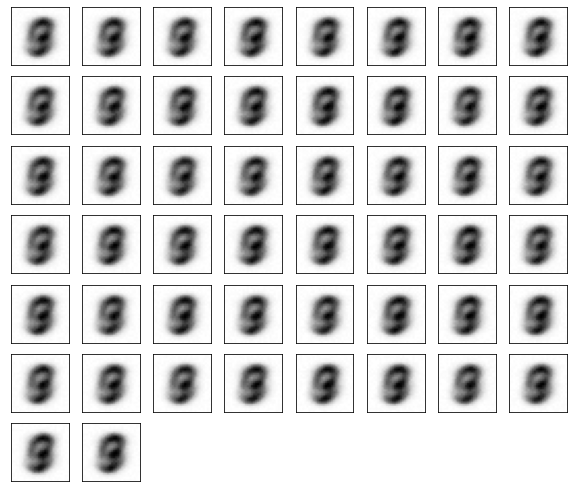

In [95]:
num_imgs = len(data_60000_50)
side_len = int(((num_imgs ** 0.5) // 1.0) + 1)

plt.figure(figsize=(10, 10))
for i, img in enumerate(data_60000_50):
    plt.subplot(side_len, side_len, i + 1)

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap="Greys")

plt.show()

What you're looking at is a bunch of satanic atrocities, also known as fuzzy 3s, because of the way they look.  I should also mention that these are the weight prototypes for each neuron, so I'm simply plotting the weights of each neuron as an image.  Now, if everything worked like I hoped it would, these images would be a beautifully diverse set of impeccable prototypes of handwritten digits.  This is obviously not the case.

I saw this behavior in the early iterations of arrakis, and I'm fairly certain it arises when all the neurons are treated the in the same manner during the learning step.  If we were going to talk about the mathematics of everything, it appears as though this setup has one principal attractor, and that's a fuzzy three.  This "competitive" setup also relies heavily on weighted averages, and I would be silly to not mention that a fuzzy three is the average value of mnist, so this current architecture isn't getting around simply tending toward the average value of the network.  

I suppose I should give a better mathematical description of how the output is reconstructed.  Let $w_{ij}$ be the weight of the $j^{th}$ synapse of the $i^{th}$ neuron.  Let $q_i$ be the input value of the $i^{th}$ pixel, and let $p_i$ be the reconstructed value of the $i^{th}$ pixel.  Let $o_i$ be the output of the $i^{th}$ neuron, let $m$ be the number of pixels (784, for mnist), and $n$ be the number of neurons.  Finally, let $\alpha$ be the learning constant. Then we have:

$$
o_i = \frac{\sum_{j = 0}^{m} q_j \cdot w_{ij}}{\sum_{j = 0}^{m} w_{ij}} $$

$$
p_t = \frac{\sum_{i = 0}^{n} o_i \cdot w_{it}}{\sum_{i = 0}^{n} o_i} 
$$

$$
\Delta w_{ij} = - \frac{o_i}{\sum_{t = 0}^{n}o_t} \cdot(p_i - q_i) \cdot\alpha
$$

Thus as previously mentioned, the output is reconstructed using a weighted average of the neuron "weight prototypes" weighted by the neuron output.  

I suppose I could take some more data, but I'm generally repulsed by that number of fuzzy threes, so I'm going to wrap this up as swiftly as possible.

I will mention that the above run of the algo got a classification of 29.7% with [this](https://github.com/DGeisz/CodeX/tree/main/Reductionist%20Quasi-Isomorphisms/11_18_2020_metric_mnist_competitive_classification) metric.  So yeah, really not great.

Also I'm realizing that I should have a technical description and details section in these write-ups so that I don't keep getting caught introducing the math in the analysis dialog.

## Conclusions

I was hoping that I would have to implement a winner-takes-all (wta) or self-organizing map (som) type of learning rule and still get "competitive" behavior, but obviously, that's not the case.  Maybe I'm have an insight like that in the future that allows me to circumvent annoying, "intuition-based" rules, but for now, that's obviously not the case.  However, the one thing that I did in this experiment that I haven't done before is to keep the focus on reconstruction.  Perhaps focusing on reconstruction together with a wta or som I can finally get a competitive algo to learn as diverse a set of inputs as the SNN that I referenced earlier.  

## Next steps

As I mentioned before, the code I wrote in this repo can be easily modified to create and study collaborative and semi-collaborative networks, which is the next experiment I'm going to run.  Additionally, if I do continue studying competitive algorithms, then I'm going to rectify the learning strategy so that it attempts to create the best reconstruction as possible, rather than simply rewarding the best prototype for a given input and moving on from there.  

## Data

In [93]:
import matplotlib.pyplot as plt 
import pickle

In [94]:
data_60000_50 = pickle.load(open("data/60000_50_001.pickle", "rb"))